

# 911 Calls Dataset

analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).
The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# Questions

 1. What are the top 5 zipcodes for 911 calls?
 2. What are the top 5 townships (twp) for 911 calls?  
 3. how many unique title codes are there?
 4. What are the reasons people called for?
 5. compare reasons people called based on day, month?

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [11]:
top_5_zip = df['zip'].value_counts().head(5)

In [12]:
top_5_zip

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [13]:
top_5_twp =df['twp'].value_counts().head(5)
top_5_twp

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [14]:
unique_title_codes = df['title'].nunique()
unique_title_codes

148

In [21]:
# What are the reasons people called for?
top_5_reasons = df['title'].value_counts().head(5)
print("Top Reasons People Called:\n")
print(top_5_reasons)

Top Reasons People Called:

title
Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: count, dtype: int64


In [34]:
# compare reasons people called based on day, month

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Day'] = df['timeStamp'].dt.day
df['Month'] = df['timeStamp'].dt.month
top_reasons_day = df.groupby('Day')['title'].value_counts().unstack().fillna(0)
#print(top_reasons_day.head())
top_reasons_month = df.groupby('Month')['title'].value_counts().unstack().fillna(0)
top_reason_per_day = top_reasons_day.idxmax(axis=1)
top_reason_per_month = top_reasons_month.idxmax(axis=1)

print("Top Reason Per Day:")
for day, reason in top_reason_per_day.items():
    print(f"{day}: {reason}")

print("\nTop Reason Per Month:")
for month, reason in top_reason_per_month.items():
    print(f"{month}: {reason}")




Top Reason Per Day:
1: Traffic: VEHICLE ACCIDENT -
2: Traffic: VEHICLE ACCIDENT -
3: Traffic: VEHICLE ACCIDENT -
4: Traffic: VEHICLE ACCIDENT -
5: Traffic: VEHICLE ACCIDENT -
6: Traffic: VEHICLE ACCIDENT -
7: Traffic: VEHICLE ACCIDENT -
8: Traffic: VEHICLE ACCIDENT -
9: Traffic: VEHICLE ACCIDENT -
10: Traffic: VEHICLE ACCIDENT -
11: Traffic: VEHICLE ACCIDENT -
12: Traffic: VEHICLE ACCIDENT -
13: Traffic: VEHICLE ACCIDENT -
14: Traffic: VEHICLE ACCIDENT -
15: Traffic: VEHICLE ACCIDENT -
16: Traffic: VEHICLE ACCIDENT -
17: Traffic: VEHICLE ACCIDENT -
18: Traffic: VEHICLE ACCIDENT -
19: Traffic: VEHICLE ACCIDENT -
20: Traffic: VEHICLE ACCIDENT -
21: Traffic: VEHICLE ACCIDENT -
22: Traffic: VEHICLE ACCIDENT -
23: Traffic: VEHICLE ACCIDENT -
24: Traffic: VEHICLE ACCIDENT -
25: Traffic: VEHICLE ACCIDENT -
26: Traffic: VEHICLE ACCIDENT -
27: Traffic: VEHICLE ACCIDENT -
28: Traffic: VEHICLE ACCIDENT -
29: Traffic: VEHICLE ACCIDENT -
30: Traffic: VEHICLE ACCIDENT -
31: Traffic: VEHICLE ACCIDENT

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [35]:
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day,Month,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,10,12,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,10,12,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,10,12,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,10,12,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,10,12,EMS


** What is the most common Reason for a 911 call based on this new column? **

In [44]:
most_common_r = df["Reason"].value_counts().idxmax()
print(f"Most common reason: {most_common_r}")
count_of_r = df["Reason"].value_counts()
print("-"*25)
print("Count of Reasons:")
print(df["Reason"].value_counts().to_string())


Most common reason: EMS
-------------------------
Count of Reasons:
Reason
EMS        332692
Traffic    230208
Fire       100622


** Now use seaborn to create a countplot of 911 calls by Reason. **

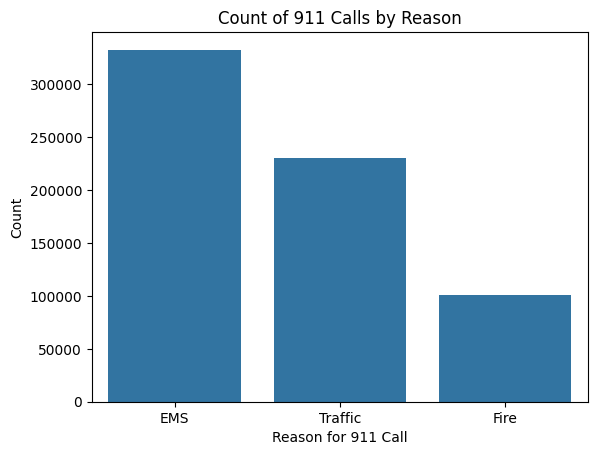

In [45]:
sns.countplot(x=df["Reason"], order=df["Reason"].value_counts().index)

plt.title("Count of 911 Calls by Reason")
plt.xlabel("Reason for 911 Call")
plt.ylabel("Count")
plt.show()

## lambda function

The lambda function lambda time: time.hour takes a time object as input (assuming you're working with Python's datetime module) and returns the hour component of the input time. This is useful when you want to extract just the hour information from a datetime object.

Here's an example of how you can use this lambda function:



In [ ]:
python
Copy code
from datetime import datetime

# Create a datetime object
timestamp = datetime(2023, 11, 11, 15, 30, 0)  # November 11, 2023, 3:30 PM

# Apply the lambda function to extract the hour
hour = (lambda time: time.hour)(timestamp)

print(hour)

Result: 15 in this case, representing 3:00 PM

## apply() Function

The apply() function in Python is a method that allows you to apply a function along the axes (either rows or columns) of a DataFrame or Series in libraries like Pandas. It is a fundamental tool for data manipulation and transformation. The general syntax for apply() is as follows:

DataFrame.apply(func, axis=0)
func: The function you want to apply to each row (if axis=1) or each column (if axis=0) of the DataFrame. This function can be a built-in Python function, a user-defined function, or a lambda function.

axis: Specifies the axis along which the function should be applied. Use axis=0 for columns (default) and axis=1 for rows.
Here are some common use cases for the apply() function:

Applying a Function to Each Column or Row:


** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.head(5)

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day'] = df['timeStamp'].apply(lambda time: time.day)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head(30)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

** Now do the same for Month:**

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**